In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns


In [7]:
df=pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

DATA EXPLORATION AND CLEANING

In [10]:
#Data size
df.size

408582

In [8]:
#Discovering the data 
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [11]:
#Data description 
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [12]:
#Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [ ]:
#THERE ARE NO MISSING DATA FROM THE RESULTS OF info() FUNCTION

THE BEST VISUALIZATION TYPE TO USE ARE:
- A box plot to determine outliers and where the bulk of data points reside in terms of trip_distance, duration, and total_amount.
- A scattee plot to visualize the trend and patters and outliers of critical variables, like trip_distance and total_amount.
- A bar chart which helps to determine the average number of trips per month, weekday, weekend, etc

DATA VISUALIZATION:

In [13]:
#BOX PLOTS

In [16]:
#Convert data columns for (tpep_pickup_datetime) and (tpep_dropoff_datetime) into datatime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

TRIP DISTANCE PLOT

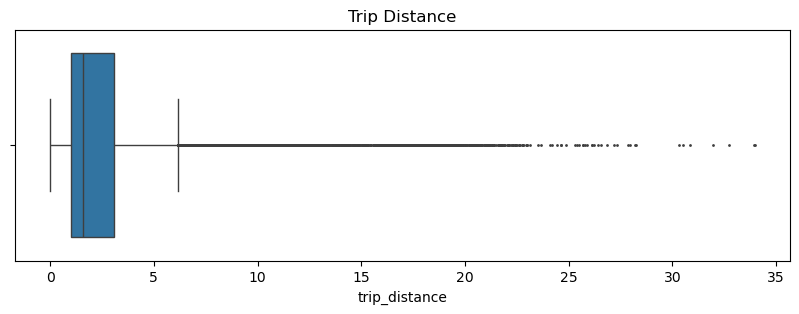

In [17]:
#Create a box plot of trip_distance
plt.figure(figsize=(10,3))
plt.title('Trip Distance')
sns.boxplot(data=None, x=df['trip_distance'], fliersize=1);

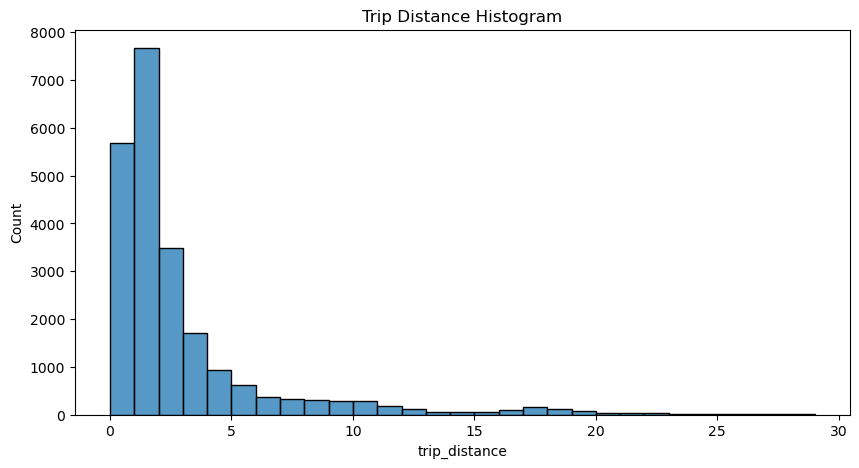

In [18]:
#Create a histogram for trip_distance 
plt.figure(figsize=(10,5))
sns.histplot(df['trip_distance'], bins=range(0,30,1))
plt.title('Trip Distance Histogram');

In [ ]:
#The majority of trips were journeys of less than two miles. The number of trips falls away steeply as the distance traveled increases beyond two miles

TOTAL AMOUNT PLOT

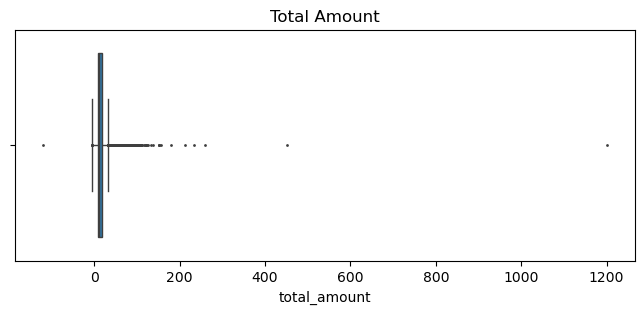

In [21]:
#Create a box plot for the total_amount
plt.figure(figsize=(8,3))
plt.title("Total Amount")
sns.boxplot(x=df["total_amount"], fliersize=1);

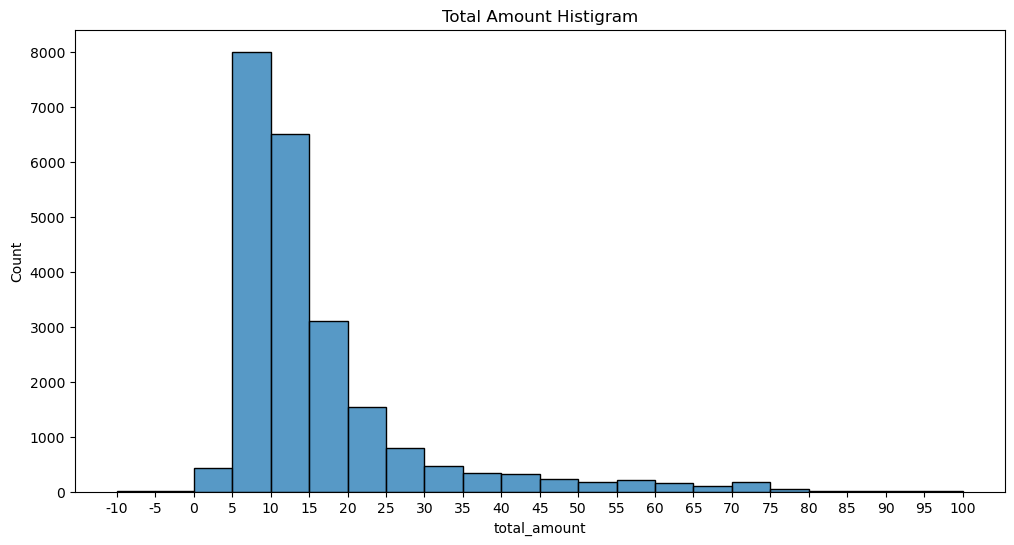

In [33]:
#Create histogram of total_amount
plt.figure(figsize=(12,6))
ax = sns.histplot(df["total_amount"], bins=range(-10,101,5))
ax.set_xticks(range(-10,101,5))
ax.set_xticklabels(range(-10,101,5))
plt.title("Total Amount Histigram");

In [ ]:
#The total cost of each trip also has a distribution that skews right, with most costs falling in the $5-15 range.

TIP AMOUNT PLOT

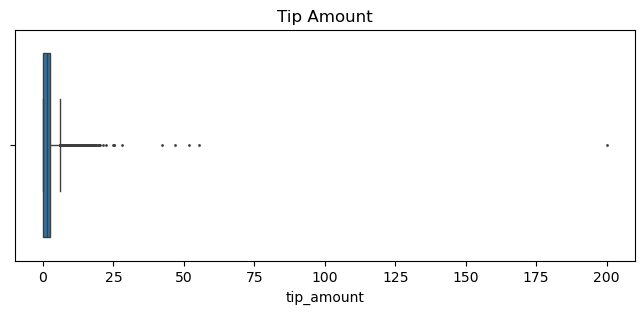

In [25]:
#Create a box plt for tip_amount
plt.figure(figsize=(8,3))
plt.title("Tip Amount")
sns.boxplot(x=df["tip_amount"], fliersize=1);

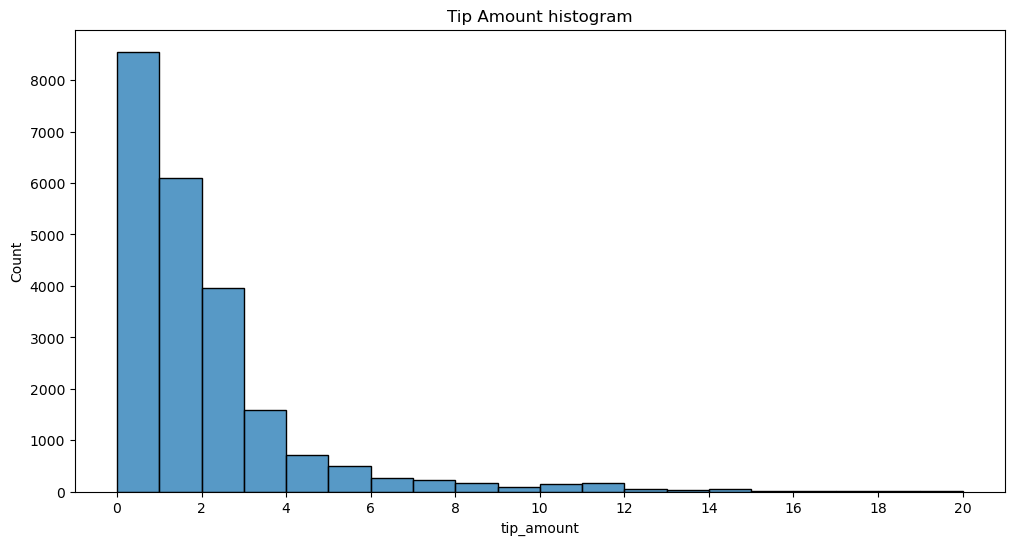

In [45]:
#Create a histogram for the tip_amount 
plt.figure(figsize=(12,6))
ax = sns.histplot(df["tip_amount"], bins=range(0,21,1))
ax.set_xticks(range(0,21,2))
ax.set_xticklabels(range(0,21,2))
plt.title("Tip Amount histogram");

In [ ]:
#The distribution for tip amount is right-skewed, with nearly all the tips in the $0-3 range.

TIP AMOUNT BY VENDOR

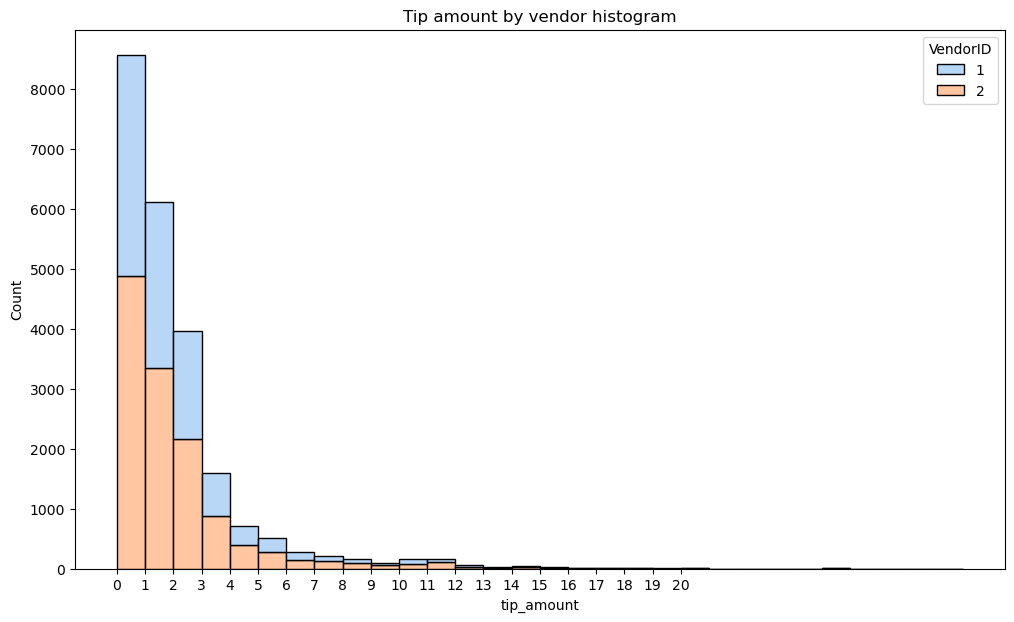

In [48]:
#Create a histogram of tip_amount by vendor

plt.figure(figsize=(12,7))
ax = sns.histplot(data=df, x="tip_amount", bins=range(0,31,1),
                  hue="VendorID",
                  multiple="stack",
                  palette="pastel")
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title("Tip amount by vendor histogram");

In [ ]:
#Separating the tip amount by vendor reveals that there are no noticable anomalies in the distribution in the distribution of tips between the two venndors in the dataset. Vendor two has a slightly higher share of the rides, and this proportion is approximately maintained for all tip amounts.

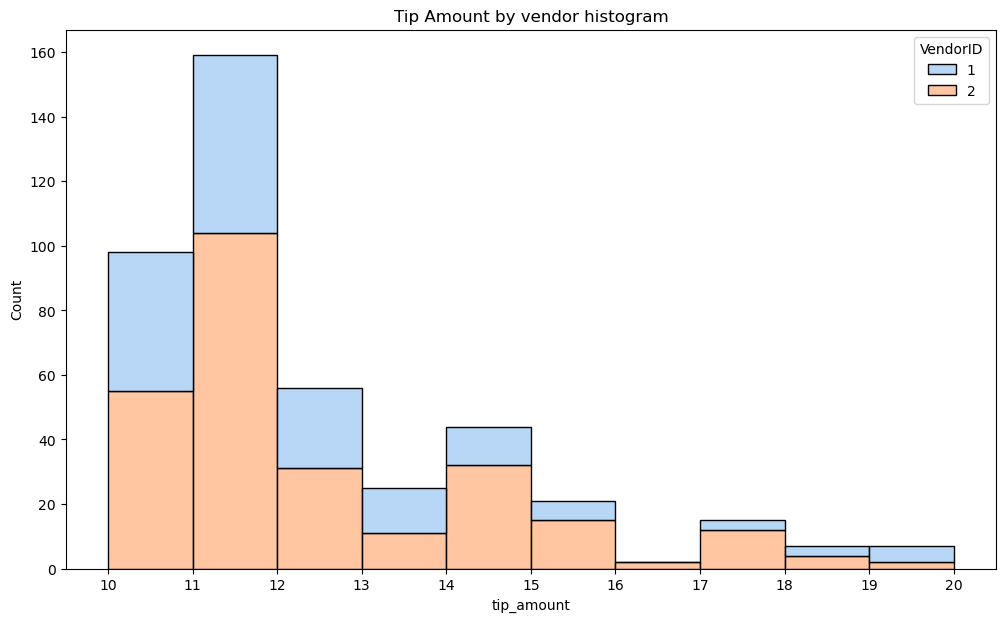

In [51]:
#Create a histogram of tip_amount by vendor for tips > $10
tips_over_ten = df[df["tip_amount"] > 10]
plt.figure(figsize=(12,7))
ax = sns.histplot(data=tips_over_ten, x="tip_amount", bins=range(10,21,1),
                  hue="VendorID",
                  multiple="stack",
                  palette="pastel")
ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1))
plt.title("Tip Amount by vendor histogram");

Even when tip amounts are higher, the general pattern stays the same. The only exception is at the very highest tips, but this isn’t important because very few people tipped that much.

In short: Most tipping behavior follows the same trend, except for rare extreme tips, which don’t really matter due to lack of data.

In [52]:
df["passenger_count"].value_counts()

passenger_count
1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: count, dtype: int64

Key Findings:
-Most rides (about 2/3) had just one passenger.
-Some rides had up to six passengers (around 700 trips).
-33 rides had zero passengers—this seems odd and might need to be removed unless there's a valid reason.

In short: Most trips were single riders, but some had multiple passengers. A few rides had no passengers at all, which may be errors.

In [57]:
#Calculate the mean tips by passenger_count
# First ensure tip_amount is numeric
df['tip_amount'] = pd.to_numeric(df['tip_amount'], errors='coerce')

# Then group by passenger_count and calculate mean
mean_tips_by_passenger_count = df.groupby(['passenger_count'])['tip_amount'].mean()

# If you want it as a DataFrame instead of a Series
mean_tips_by_passenger_count = df.groupby(['passenger_count'])[['tip_amount']].mean()
mean_tips_by_passenger_count

,tip_amount
passenger_count,
0,2.135758
1,1.848920
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


C:\Users\bpmog\AppData\Local\Temp\ipykernel_632\1414174596.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=data.index,
C:\Users\bpmog\AppData\Local\Temp\ipykernel_632\1414174596.py:6: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x=data.index,


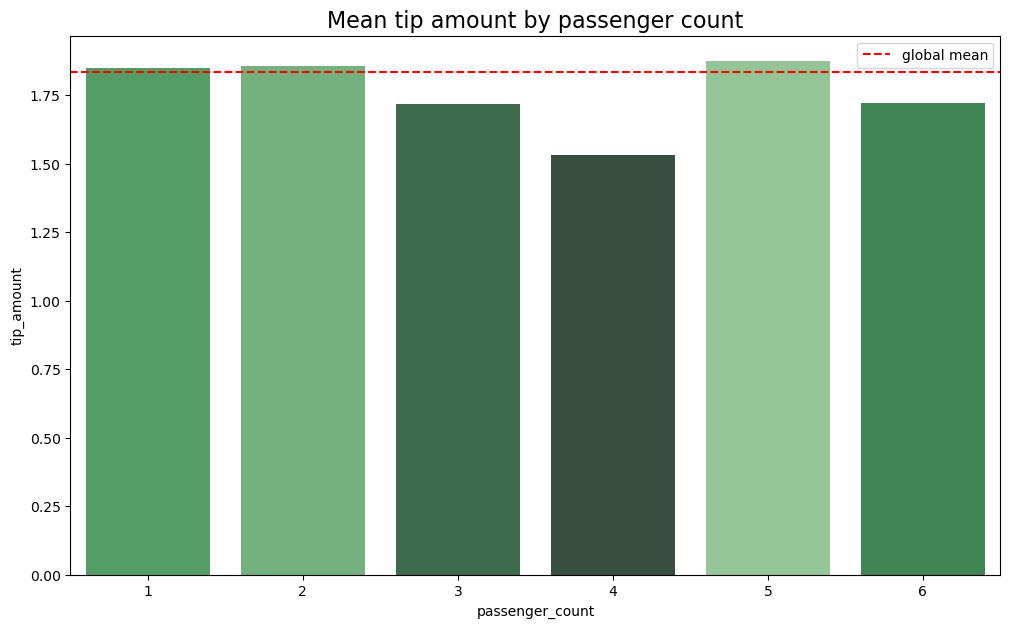

In [60]:
# Create bar plot for mean tips by passenger count
data = mean_tips_by_passenger_count.tail(-1)
pal = sns.color_palette("Greens_d", len(data))
rank = data['tip_amount'].argsort().argsort()
plt.figure(figsize=(12,7))
ax = sns.barplot(x=data.index,
            y=data['tip_amount'],
            palette=np.array(pal[::-1])[rank])
ax.axhline(df['tip_amount'].mean(), ls='--', color='red', label='global mean')
ax.legend()
plt.title('Mean tip amount by passenger count', fontsize=16);

Key Takeaway:
-Tip amounts stay roughly the same regardless of passenger count.
-The only exception is for 4-passenger rides, where tips dip slightly—but this isn’t surprising because there were very few rides with four passengers (making the data less reliable).

In short: Tips don’t change much based on how many passengers are in the ride. The slight drop for 4-passenger trips isn’t a big concern because there weren’t many of them.

CREATE MONTH AND DAY COLUMNS:

In [62]:
#Create a month column
df["month"] = df["tpep_pickup_datetime"].dt.month_name()

#Create a day column
df["day"] = df["tpep_pickup_datetime"].dt.day_name()

PLOT TOTAL RIDE COUNT BY MONTH

In [63]:
# Get total number of rides for each month
monthly_rides = df['month'].value_counts()
monthly_rides

month
March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: count, dtype: int64

This months are out of order, need to be reordered

In [64]:
#Reorder the monthly ride list so months go in order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

monthly_rides = monthly_rides.reindex(index=month_order)
monthly_rides

month
January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: count, dtype: int64

In [65]:
# Show the index
monthly_rides.index

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object', name='month')

C:\Users\bpmog\AppData\Local\Temp\ipykernel_632\665060298.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(month_order)


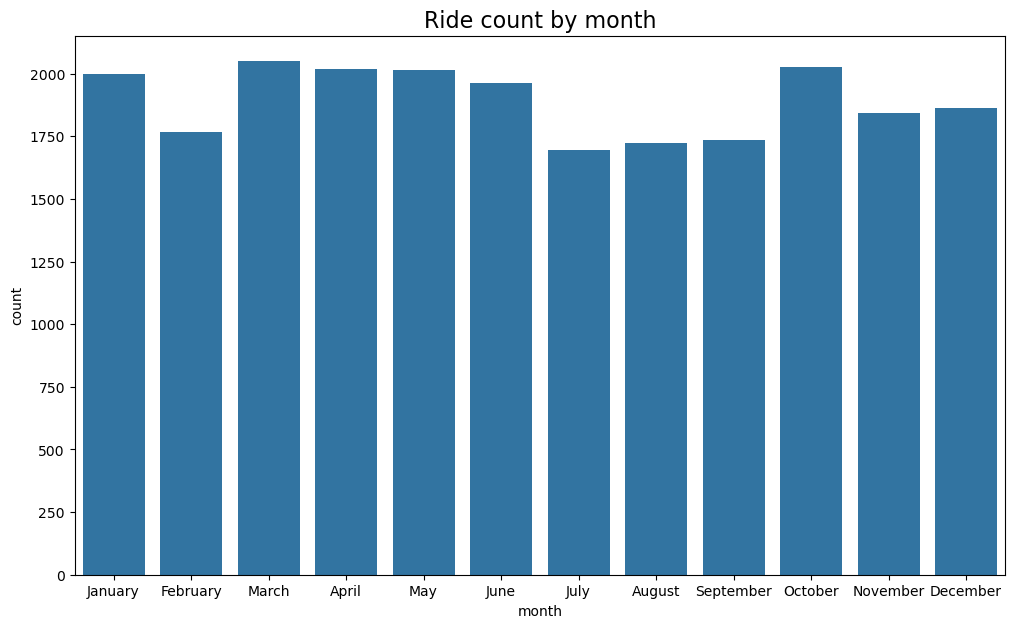

In [66]:
# Create a bar plot of total rides per month
plt.figure(figsize=(12,7))
ax = sns.barplot(x=monthly_rides.index, y=monthly_rides)
ax.set_xticklabels(month_order)
plt.title('Ride count by month', fontsize=16);

Key Insight:
-Ride numbers stay steady throughout the year.
-However, there are noticeable drops in February and during summer (July–September).

In short: Ride demand is stable overall but dips slightly in February and the summer months.

PLOT TOTAL RIDE COUNT BY  DAY

In [67]:
#Create the order of rides by days
daily_rides = df['day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = daily_rides.reindex(index=day_order)
daily_rides

day
Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: count, dtype: int64

C:\Users\bpmog\AppData\Local\Temp\ipykernel_632\2425157935.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(day_order)


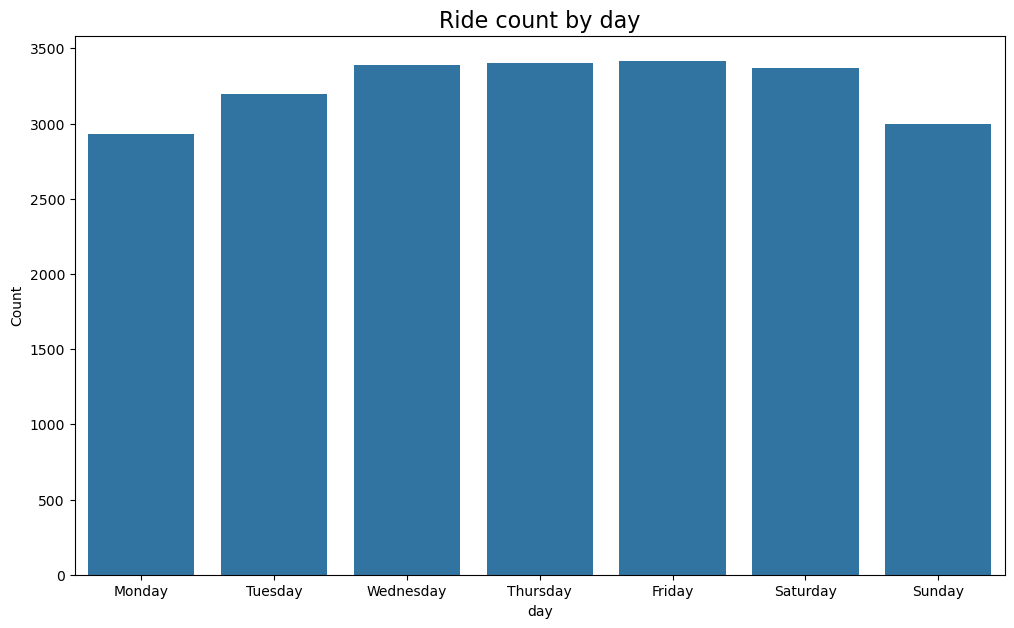

In [68]:
# Create bar plot for ride count by day
plt.figure(figsize=(12,7))
ax = sns.barplot(x=daily_rides.index, y=daily_rides)
ax.set_xticklabels(day_order)
ax.set_ylabel('Count')
plt.title('Ride count by day', fontsize=16);

Key Insight:

-Rides peak midweek (Wednesday–Saturday) and drop significantly on Sundays and Mondays.

Possible Implication:
-This pattern suggests higher demand toward the end of the week, possibly due to social outings, events, or commuting habits, while early-week days see fewer rides.

PLOT THE TOTAL REVENUE BY DAY OF THE WEEK

In [72]:
#Create the oder by of total revenue by days of the weeks
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_amount_day = df.groupby('day')['total_amount'].sum().reset_index()
total_amount_day = total_amount_day.set_index('day')
total_amount_day = total_amount_day.reindex(index=day_order)
total_amount_day

,total_amount
day,
Monday,49574.37
Tuesday,52527.14
Wednesday,55310.47
Thursday,57181.91
Friday,55818.74
Saturday,51195.40
Sunday,48624.06


C:\Users\bpmog\AppData\Local\Temp\ipykernel_632\410621597.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(day_order)


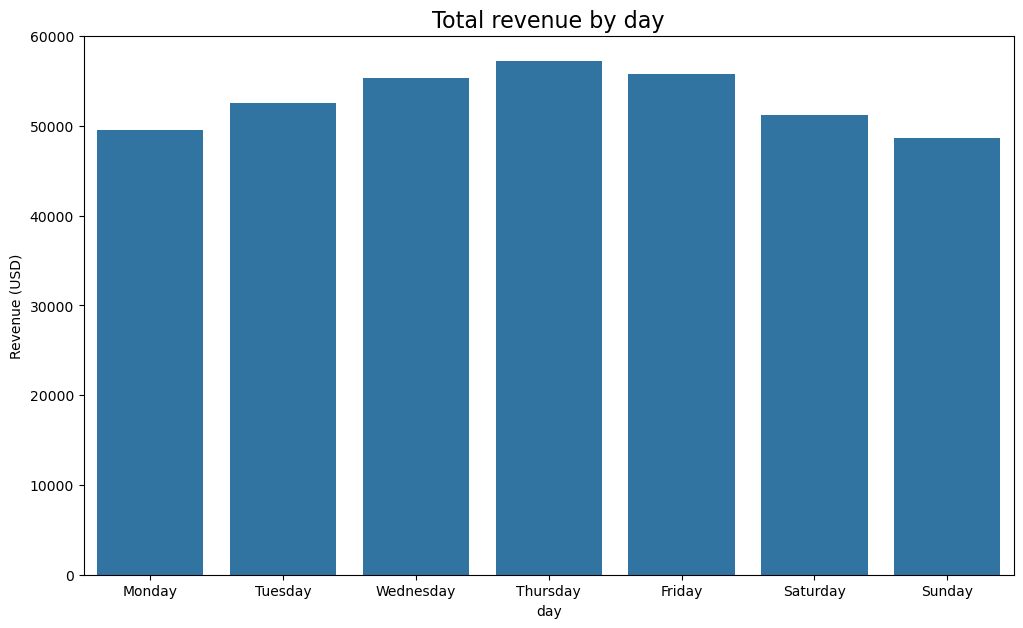

In [73]:
# Create bar plot of total revenue by day
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_day.index, y=total_amount_day['total_amount'])
ax.set_xticklabels(day_order)
ax.set_ylabel('Revenue (USD)')
plt.title('Total revenue by day', fontsize=16);

Key Takeaways:
-Thursday was the top-performing day in revenue, while Sunday and Monday had the lowest.
-Despite Saturday having nearly as many rides as Thursday (just 35 fewer), its revenue was over $6,000 less—a drop of more than 10%.

Possible Implications:
-Higher-value rides may occur on Thursdays (e.g., business travel, events).
-Saturday riders might spend less per trip (e.g., shorter distances, fewer premium rides).

PLOT TOTAL REVENUE BY MONTH

In [78]:
#Total revenue by month
total_amount_month = df.groupby('month')['total_amount'].sum().reset_index()
total_amount_month = total_amount_month = total_amount_month.set_index('month')
total_amount_month = total_amount_month.reindex(index=month_order)
total_amount_month

,total_amount
month,
January,31735.25
February,28937.89
March,33085.89
April,32012.54
May,33828.58
June,32920.52
July,26617.64
August,27759.56
September,28206.38


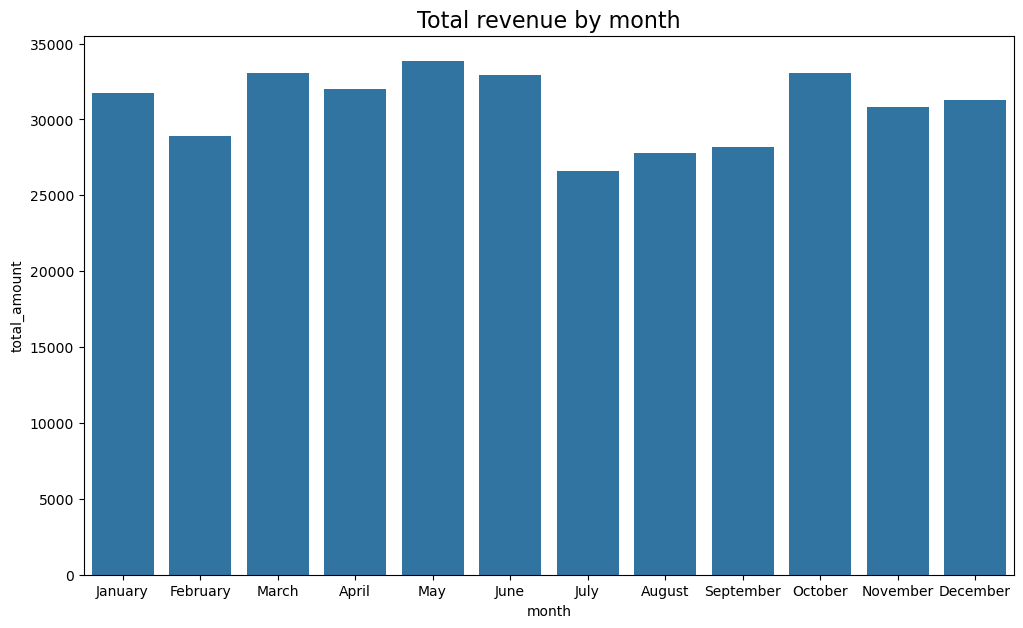

In [79]:
# Create a bar plot of total revenue by month
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_month.index, y=total_amount_month['total_amount'])
plt.title('Total revenue by month', fontsize=16);

Key Revenue Pattern:
-Revenue closely mirrors ride volume trends month-to-month.
-Consistent seasonal dips occur during summer (July–September) and in February.

Notable Implication:
-The parallel declines suggest these slowdowns reflect broader demand shifts rather than changes in spending per ride.

PLOT MEAN TRIP DISTANCE BY DROP-OFF LOCATION

In [80]:
# Get number of unique drop-off location IDs
df['DOLocationID'].nunique()

216

In [83]:
# Calculate the mean trip distance for each drop-off location
# First, ensure trip_distance is numeric
df['trip_distance'] = pd.to_numeric(df['trip_distance'], errors='coerce')

# Calculate the mean trip distance for each drop-off location
distance_by_dropoff = df.groupby('DOLocationID')['trip_distance'].mean().reset_index()

# Sort the results in descending order by mean trip distance
distance_by_dropoff = distance_by_dropoff.sort_values(by='trip_distance')
distance_by_dropoff

,DOLocationID,trip_distance
164,207,1.200000
154,193,1.390556
192,237,1.555494
189,234,1.727806
109,137,1.818852
...,...,...
40,51,17.310000
5,11,17.945000
167,210,20.500000
21,29,21.650000


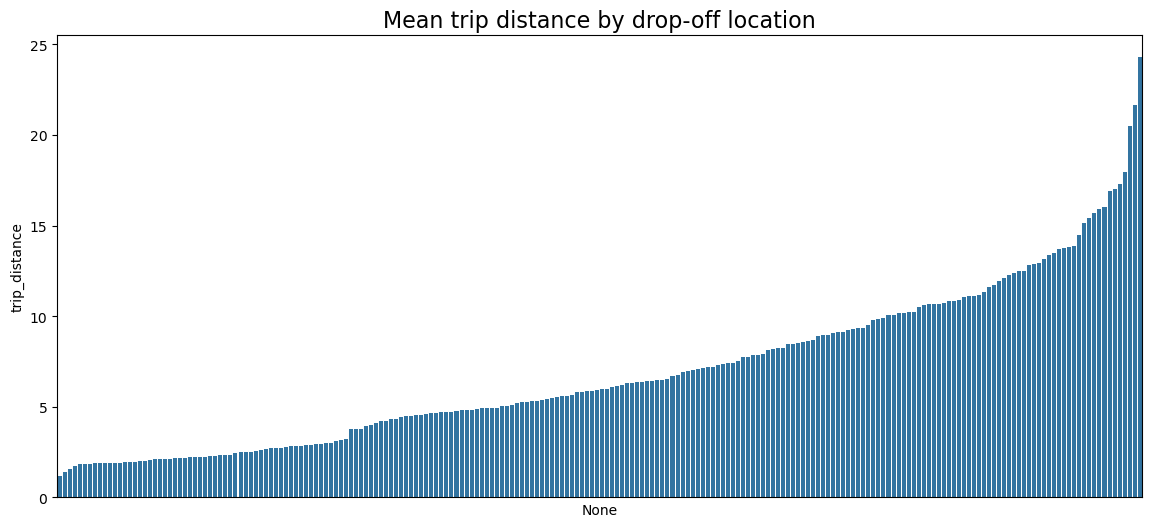

In [84]:
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance
plt.figure(figsize=(14,6))
ax = sns.barplot(x=distance_by_dropoff.index, 
                 y=distance_by_dropoff['trip_distance'],
                 order=distance_by_dropoff.index)
ax.set_xticklabels([])
ax.set_xticks([])
plt.title('Mean trip distance by drop-off location', fontsize=16);

Key Insight:
-The plot follows a classic normal distribution pattern, showing that drop-off points are evenly spread across the area.

Why It Matters:
-Since geographic data wasn’t available, this pattern confirms that ride destinations aren’t clustered in specific hotspots—they’re distributed broadly.

Bottom Line:
-Even without location coordinates, the even distribution suggests balanced demand across the service area.

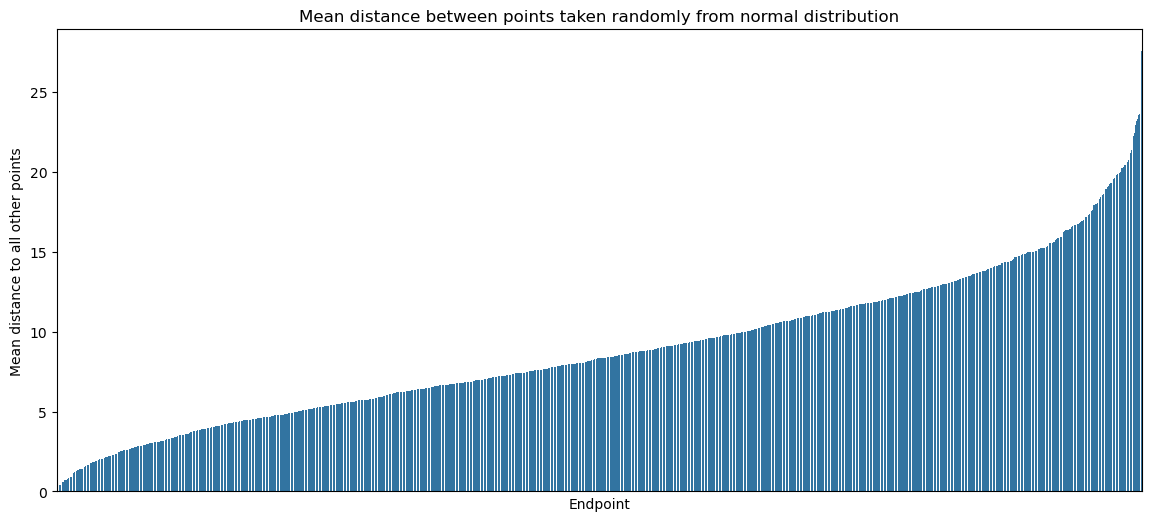

In [86]:
# 1. Generate random points on a 2D plane from a normal distribution
test = np.round(np.random.normal(10, 5, (3000, 2)), 1)
midway = int(len(test)/2)  # Calculate midpoint of the array of coordinates
start = test[:midway]      # Isolate first half of array ("pick-up locations")
end = test[midway:]        # Isolate second half of array ("drop-off locations")

# 2. Calculate Euclidean distances between points in first half and second half of array
distances = (start - end)**2           
distances = distances.sum(axis=-1)
distances = np.sqrt(distances)

# 3. Group the coordinates by "drop-off location", compute mean distance
# Convert tuples to strings to avoid MultiIndex issues
test_df = pd.DataFrame({
    'start': [str(tuple(x)) for x in start.tolist()],
    'end': [str(tuple(x)) for x in end.tolist()],
    'distance': distances
})
data = test_df[['end', 'distance']].groupby('end').mean()
data = data.sort_values(by='distance')

# 4. Plot the mean distance between each endpoint ("drop-off location") and all points it connected to
plt.figure(figsize=(14,6))
ax = sns.barplot(x=data.index,
                 y=data['distance'],
                 order=data.index)
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_xlabel('Endpoint')
ax.set_ylabel('Mean distance to all other points')
ax.set_title('Mean distance between points taken randomly from normal distribution');

Key Observations:

Geographic Distribution:
-The graph's curve closely matches the pattern of average trip distances.
-This confirms that drop-off locations are evenly spread out geographically.

Important Clarification:
-Even spacing of drop-off points does not mean rides were equally distributed among them.
-Some locations likely had far more drop-offs than others.

Next Step:
-Investigate actual ride counts per location to identify high-traffic vs. low-traffic zones.

Why It Matters:
-This distinction helps separate physical distribution (where drop-offs can happen) from demand patterns (where they actually happen most).

In [ ]:
HISTOGRAM OF RIDES BY DROP-OFF LOCATION:

In [87]:
# Check if all drop-off locations are consecutively numbered
df['DOLocationID'].max() - len(set(df['DOLocationID'])) 

49

There are 49 numbers that do not reperesnt a drop-off location

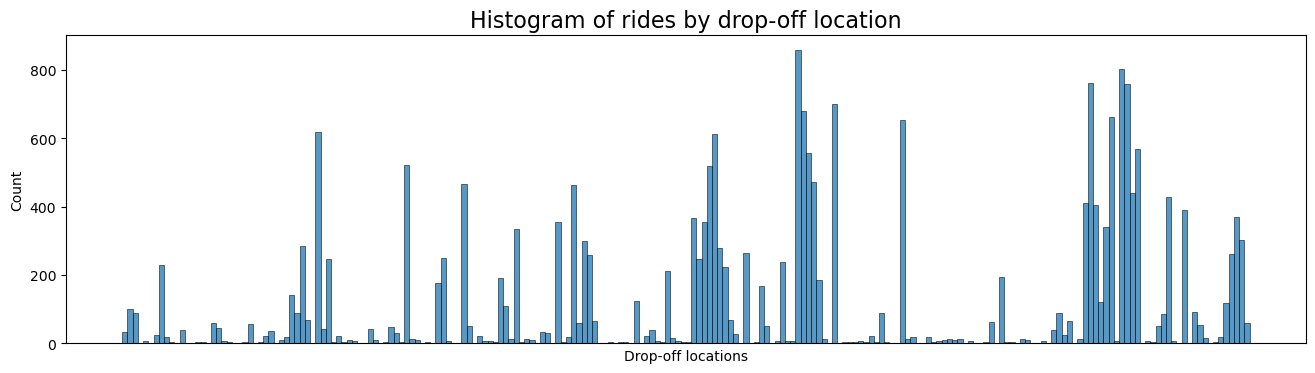

In [88]:
plt.figure(figsize=(16,4))
# DOLocationID column is numeric, so sort in ascending order
sorted_dropoffs = df['DOLocationID'].sort_values()
# Convert to string
sorted_dropoffs = sorted_dropoffs.astype('str')
# Plot
sns.histplot(sorted_dropoffs, bins=range(0, df['DOLocationID'].max()+1, 1))
plt.xticks([])
plt.xlabel('Drop-off locations')
plt.title('Histogram of rides by drop-off location', fontsize=16);

Key Insight: "The 80/20 Rule of Taxi Drop-Offs"

Highly Concentrated Demand:
-While there are 200+ drop-off points, a small fraction (<20%) likely handles most rides—consistent with urban "hotspots."

Probable High-Traffic Zones:
-These hubs are almost certainly near major attractions (e.g., Times Square, Empire State Building), transit hubs (Grand Central, Penn Station), and airports (JFK, LaGuardia).

Data Limitation:
-Without geographic IDs, we can’t pinpoint exact locations or validate assumptions.

Strategic Implications:
-Efficiency Focus: Optimize driver allocation to high-traffic zones during peak times.

Data Enhancement: Advocate for adding location IDs (e.g., landmarks/neighborhoods) to future datasets.

Next Steps:
-If possible, cross-reference timestamps with events (e.g., concerts, holidays) to explain demand spikes.

In [89]:
df['trip_duration'] = (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])

In [90]:
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday,0 days 00:14:04
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday,0 days 00:26:30
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday,0 days 00:07:12
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday,0 days 00:30:15
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday,0 days 00:16:43
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,...,9.0,0.5,0.5,2.06,0.0,0.3,12.36,March,Saturday,0 days 00:08:00
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,...,47.5,1.0,0.5,9.86,0.0,0.3,59.16,May,Wednesday,0 days 00:59:38
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,...,16.0,1.0,0.5,1.78,0.0,0.3,19.58,August,Tuesday,0 days 00:21:59
8,8433159,2,2017-02-04 16:17:07,2017-02-04 16:29:14,1,1.20,1,N,234,249,...,9.0,0.0,0.5,0.00,0.0,0.3,9.80,February,Saturday,0 days 00:12:07
9,95294817,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,...,13.0,0.0,0.5,2.75,0.0,0.3,16.55,November,Friday,0 days 00:20:26
